In [109]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import KFold, GroupKFold, StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV



In [37]:
plt.rcParams.update({
    "text.usetex": True,                # Use LaTeX for all text
    "font.family": "serif",             # Use a serif font family (LaTeX default)
    "font.serif": ["Computer Modern"],  # Default LaTeX serif font
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11
})

In [26]:
# set path to compustat csv file:
clean_csv_path = "/Users/songyi/Documents/st310/st310_groupproject/compustat_df_1980_deduplicated_extended_winsor.csv"

clean_df_1980 = pd.read_csv(clean_csv_path)
clean_df_1980.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487606 entries, 0 to 487605
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   gvkey                         487606 non-null  int64  
 1   datadate                      487606 non-null  object 
 2   fyear                         487606 non-null  int64  
 3   conm                          487606 non-null  object 
 4   tic                           487403 non-null  object 
 5   naicsh                        359011 non-null  float64
 6   revt                          397091 non-null  float64
 7   oibdp                         351477 non-null  float64
 8   ni                            356282 non-null  float64
 9   xint                          377662 non-null  float64
 10  dp                            385478 non-null  float64
 11  at                            399664 non-null  float64
 12  act                           334680 non-nul

In [40]:

print(clean_df_1980.columns.tolist())


['gvkey', 'datadate', 'fyear', 'conm', 'tic', 'naicsh', 'revt', 'oibdp', 'ni', 'xint', 'dp', 'at', 'act', 'che', 'lt', 'lct', 'dlc', 'dltt', 'ceq', 'csho', 'dv', 'at_fn', 'TL_flag', 'gross_margin', 'net_profit_margin', 'roa', 'roe', 'asset_turnover', 'cash_to_assets', 'fixed_asset_intensity', 'current_ratio', 'quick_ratio', 'total_debt', 'debt_to_assets', 'debt_to_equity', 'liabilities_to_assets', 'interest_coverage', 'long_term_debt_ratio', 'book_value_per_share', 'earnings_per_share', 'dividend_payout_ratio', 'dividend_yield', 'retention_ratio', 'revt_1_year_pct_change', 'at_1_year_pct_change', 'ni_1_year_pct_change', 'oibdp_1_year_pct_change', 'ceq_1_year_pct_change', 'total_debt_1_year_pct_change', 'revt_2_year_pct_change', 'at_2_year_pct_change', 'ni_2_year_pct_change', 'oibdp_2_year_pct_change', 'ceq_2_year_pct_change', 'total_debt_2_year_pct_change', 'revt_5_year_pct_change', 'at_5_year_pct_change', 'ni_5_year_pct_change', 'oibdp_5_year_pct_change', 'ceq_5_year_pct_change', 'tot

In [41]:
pd.set_option('display.max_columns', None)
clean_df_1980.tail()

,gvkey,datadate,fyear,conm,tic,naicsh,revt,oibdp,ni,xint,dp,at,act,che,lt,lct,dlc,dltt,ceq,csho,dv,at_fn,TL_flag,gross_margin,net_profit_margin,roa,roe,asset_turnover,cash_to_assets,fixed_asset_intensity,current_ratio,quick_ratio,total_debt,debt_to_assets,debt_to_equity,liabilities_to_assets,interest_coverage,long_term_debt_ratio,book_value_per_share,earnings_per_share,dividend_payout_ratio,dividend_yield,retention_ratio,revt_1_year_pct_change,at_1_year_pct_change,ni_1_year_pct_change,oibdp_1_year_pct_change,ceq_1_year_pct_change,total_debt_1_year_pct_change,revt_2_year_pct_change,at_2_year_pct_change,ni_2_year_pct_change,oibdp_2_year_pct_change,ceq_2_year_pct_change,total_debt_2_year_pct_change,revt_5_year_pct_change,at_5_year_pct_change,ni_5_year_pct_change,oibdp_5_year_pct_change,ceq_5_year_pct_change,total_debt_5_year_pct_change,bkcy_next_year,1y_ahead_default,2y_ahead_default
487601,366911,2022-12-31,2022,AMRIZE LTD,AMRZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
487602,366911,2023-12-31,2023,AMRIZE LTD,AMRZ,327310.0,11677.000,2738.000,956.000,559.000,851.000,23047.000,3939.000,1107.000,13844.000,2443.000,319.000,9205.000,9203.000,NaN,0.0,UG,0,0.234478,0.081870,0.041480,0.103879,0.506660,0.048032,0.829088,1.612362,0.453131,9524.000,0.413243,1.034880,0.600686,4.898032,0.500054,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
487603,366911,2024-12-31,2024,AMRIZE LTD,AMRZ,327310.0,11704.000,3097.000,1274.000,533.000,889.000,23805.000,4781.000,1585.000,13891.000,2550.000,348.000,9196.000,9915.000,NaN,0.0,UG,0,0.264610,0.108852,0.053518,0.128492,0.491661,0.066583,0.799160,1.874902,0.621569,9544.000,0.400924,0.962582,0.583533,5.810507,0.481189,NaN,NaN,0.0,0.0,1.0,0.002312,0.032889,0.332636,0.131118,0.077366,0.002100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487604,369350,2023-12-31,2023,THE MAGNUM ICE CREAM CO,MICC,311520.0,8420.521,1258.988,543.830,11.053,327.182,5828.486,1672.388,57.478,3026.435,2162.056,80.690,137.063,2774.417,NaN,0.0,UI,0,0.149514,0.064584,0.093306,0.196016,1.444718,0.009862,0.713066,0.773517,0.026585,217.753,0.037360,0.078486,0.519249,113.904641,0.047077,NaN,NaN,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
487605,369350,2024-12-31,2024,THE MAGNUM ICE CREAM CO,MICC,311520.0,8227.629,1307.600,599.446,13.459,321.982,5715.961,1686.524,72.472,2816.050,2100.649,88.002,106.637,2876.098,NaN,0.0,UI,0,0.158928,0.072858,0.104872,0.208423,1.439413,0.012679,0.704945,0.802859,0.034500,194.639,0.034052,0.067675,0.492664,97.154321,0.035751,NaN,NaN,0.0,0.0,1.0,-0.022907,-0.019306,0.102267,0.038612,0.036650,-0.106148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# pre-process data

In [29]:
'''
# function to standardise columns in the DataFrame
def standardize_columns(df, columns):
    df_copy = df.copy()
    for col in columns:
        df_copy[col] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()
    return df_copy

cols = ['at', 'lt', 'revt', 'cogs', 'xsga', 'oiadp', 'ni', 'dltt', 'dlc', 'che', 'act', 'lct', 'emp']
clean_std_df_1980 = standardize_columns(clean_df_1980, cols)
'''


"\n# function to standardise columns in the DataFrame\ndef standardize_columns(df, columns):\n    df_copy = df.copy()\n    for col in columns:\n        df_copy[col] = (df_copy[col] - df_copy[col].mean()) / df_copy[col].std()\n    return df_copy\n\ncols = ['at', 'lt', 'revt', 'cogs', 'xsga', 'oiadp', 'ni', 'dltt', 'dlc', 'che', 'act', 'lct', 'emp']\nclean_std_df_1980 = standardize_columns(clean_df_1980, cols)\n"

In [85]:
# create forward-looking bankruptcy indicator
# as we use financial ratios from time t to predict bankruptcy at time t+1 and t+2, 
# we need to shift the bankruptcy flag column up by one year within each firm (gvkey)

clean_df_1980 = clean_df_1980.sort_values(['gvkey', 'fyear'])

clean_df_1980['1y_ahead_default'] = (
    clean_df_1980
    .groupby('gvkey')['TL_flag']
    .shift(-1)
)

clean_df_1980['2y_ahead_default'] = (
    clean_df_1980
    .groupby('gvkey')['TL_flag']
    .shift(-2)
)

# feature selection

In [99]:
# select feature columns for KNN model
liquidity_ratios = ['current_ratio', 'quick_ratio']
leverage_ratios = ['debt_to_equity', 'liabilities_to_assets', 'interest_coverage', 'total_debt', 'debt_to_assets']
marketvalue_ratios = ['book_value_per_share', 'earnings_per_share', 'dividend_payout_ratio', 'dividend_yield', 'retention_ratio']
profitability_ratios = ['gross_margin', 'net_profit_margin', 'roa', 'roe']
efficiency_ratios = ['asset_turnover']
feature_cols = liquidity_ratios + leverage_ratios + marketvalue_ratios + profitability_ratios + efficiency_ratios

# create X and y dataframes
X = clean_df_1980[feature_cols].copy()
y = clean_df_1980[['1y_ahead_default']].copy()

# drop rows with undefined X and y
mask = (
    y['1y_ahead_default'].notnull()
    & X.notnull().all(axis=1)
)

X = X.loc[mask]
y = y.loc[mask]

X_df = X.copy()

X = X.to_numpy()
y = y.to_numpy().ravel()

print(len(X))
print(len(y))




232000
232000


In [79]:
# Compute correlation matrix (Pearson)
ordered_cols = (
    liquidity_ratios
    + leverage_ratios
    + marketvalue_ratios
    + profitability_ratios
    + efficiency_ratios
)

corr_matrix = clean_df_1980[ordered_cols].dropna().corr()

corr_matrix


,current_ratio,quick_ratio,debt_to_equity,liabilities_to_assets,interest_coverage,total_debt,debt_to_assets,book_value_per_share,earnings_per_share,dividend_payout_ratio,dividend_yield,retention_ratio,gross_margin,net_profit_margin,roa,roe,asset_turnover
current_ratio,1.000000,0.918106,-0.035456,-0.202912,-0.082856,-0.099229,-0.217632,-0.033778,-0.033999,-0.043945,-0.066941,0.042628,-0.096509,-0.077833,0.075462,-0.013285,-0.152860
quick_ratio,0.918106,1.000000,-0.036538,-0.130458,-0.137871,-0.063952,-0.145113,-0.032505,-0.037032,-0.048751,-0.063403,0.046952,-0.153402,-0.134533,0.020658,-0.023418,-0.227794
debt_to_equity,-0.035456,-0.036538,1.000000,-0.046362,0.003540,0.050322,-0.023988,0.065569,0.031474,0.020442,0.228329,-0.019677,0.027233,0.028654,0.044143,-0.317708,-0.019417
liabilities_to_assets,-0.202912,-0.130458,-0.046362,1.000000,-0.027992,-0.008665,0.851052,-0.016327,-0.023094,-0.035907,-0.050478,0.034019,-0.181261,-0.207548,-0.694336,0.069551,0.140671
interest_coverage,-0.082856,-0.137871,0.003540,-0.027992,1.000000,0.014076,-0.016537,0.010359,0.030213,0.043117,0.059640,-0.039312,0.169887,0.155198,0.100262,0.065555,0.103215
total_debt,-0.099229,-0.063952,0.050322,-0.008665,0.014076,1.000000,0.027330,0.045116,0.059341,0.116599,0.162152,-0.110928,0.038185,0.037032,0.045161,0.020491,-0.131527
debt_to_assets,-0.217632,-0.145113,-0.023988,0.851052,-0.016537,0.027330,1.000000,-0.007796,-0.021906,-0.027753,-0.044155,0.020541,-0.135992,-0.160423,-0.524095,0.066318,0.055248
book_value_per_share,-0.033778,-0.032505,0.065569,-0.016327,0.010359,0.045116,-0.007796,1.000000,0.683173,0.050913,0.067904,-0.046215,0.020566,0.020266,0.024998,0.008051,-0.038118
earnings_per_share,-0.033999,-0.037032,0.031474,-0.023094,0.030213,0.059341,-0.021906,0.683173,1.000000,0.104742,0.099956,-0.087795,0.029314,0.031414,0.041534,0.030196,-0.014038
dividend_payout_ratio,-0.043945,-0.048751,0.020442,-0.035907,0.043117,0.116599,-0.027753,0.050913,0.104742,1.000000,0.350639,-0.910018,0.037168,0.037616,0.049721,0.030765,-0.029282


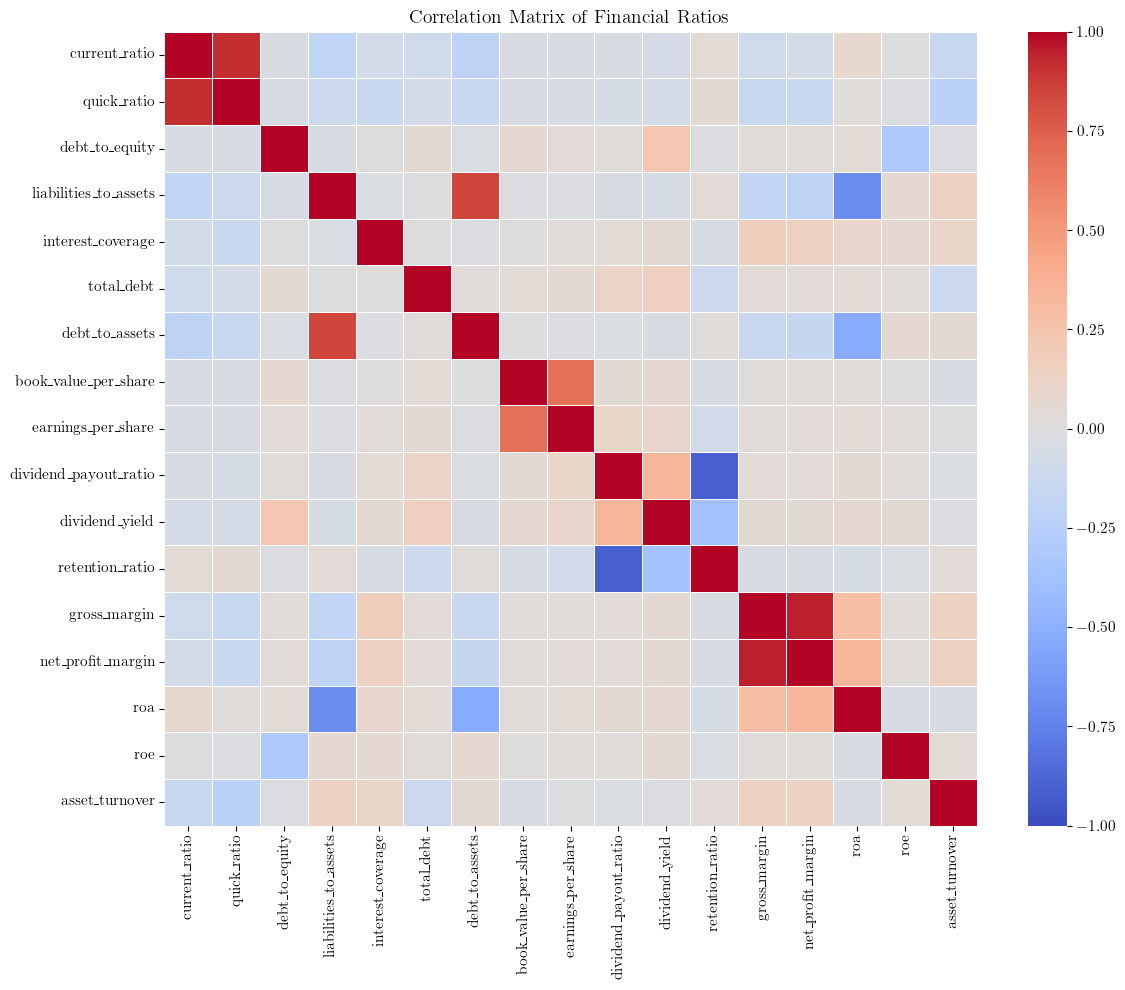

In [80]:
# correlation heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    annot=False,       
    linewidths=0.5
)

plt.title("Correlation Matrix of Financial Ratios")
plt.tight_layout()
plt.show()

In [81]:
# identify highly correlated pairs
corr_threshold = 0.8

high_corr_pairs = (
    corr_matrix
    .abs()
    .where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

high_corr_pairs.columns = ["Ratio 1", "Ratio 2", "Abs Correlation"]

high_corr_pairs = high_corr_pairs[high_corr_pairs["Abs Correlation"] > corr_threshold]

high_corr_pairs.sort_values("Abs Correlation", ascending=False)

,Ratio 1,Ratio 2,Abs Correlation
126,gross_margin,net_profit_margin,0.949099
0,current_ratio,quick_ratio,0.918106
109,dividend_payout_ratio,retention_ratio,0.910018
47,liabilities_to_assets,debt_to_assets,0.851052


# KNN classification with 5-fold stratified cross-validation

In [ ]:
def threshold_for_target_recall(y_true, probs, target=0.20):
    """
    Find the highest threshold such that recall >= target.
    """
    ts = np.unique(probs)
    for t in ts[::-1]:  # iterate from high to low
        y_hat = (probs >= t).astype(int)
        if recall_score(y_true, y_hat, zero_division=0) >= target:
            return t
    return 1.0  # fallback: predict no bankruptcies


In [103]:
n_splits = 5

n_samples = X.shape[0]
'''max_k = 201
k_values = np.unique(np.round(np.logspace(0, np.log10(max_k), 30)).astype(int))
k_values = k_values[k_values % 2 == 1]  # odd only'''
k_values = np.arange(1, 31, 2)

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

results = []           # store summary for each k
all_fold_details = []  # store per-fold metrics

for k in k_values:
    print('\n' + '='*50)
    print(f'k = {k}')
    print('='*50)

    fold_metrics = {"acc": [], "recall": [], "precision": [], "f1": [], "auc": []}
    
    # Stratified K-Fold CV
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), start=1):
        # print(f'\nFold {fold}')
        # print('Train indices:', train_idx)
        # print('Validation indices:', val_idx)

        X_tr, X_val = X[train_idx], X[val_idx]
        y_tr, y_val = y[train_idx], y[val_idx]
        
        # Scale within fold
        scaler = StandardScaler()
        X_tr  = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)
        
        knn_cv = KNeighborsClassifier(n_neighbors=k)
        knn_cv.fit(X_tr, y_tr)
        
        # val_pred = knn_cv.predict(X_val) # sets probability to 0.5 by default
        val_prob = knn_cv.predict_proba(X_val)[:, 1]

        # choose threshold to hit recall target
        target_recall = 0.20
        threshold = threshold_for_target_recall(y_val, val_prob, target=target_recall)

        val_pred = (val_prob >= threshold).astype(int)

        
        fold_acc = accuracy_score(y_val, val_pred)
        fold_rec = recall_score(y_val, val_pred, zero_division=0)
        fold_pre = precision_score(y_val, val_pred, zero_division=0)
        fold_f1  = f1_score(y_val, val_pred, zero_division=0)
       
        # AUC can fail if y_val has only one class
        try:
            fold_auc = roc_auc_score(y_val, val_prob)
        except ValueError:
            fold_auc = np.nan
            
        fold_metrics["acc"].append(fold_acc)
        fold_metrics["recall"].append(fold_rec)
        fold_metrics["precision"].append(fold_pre)
        fold_metrics["f1"].append(fold_f1)
        fold_metrics["auc"].append(fold_auc)

        print(f'Validation metrics (fold {fold}, k={k}): '
              f'Acc={fold_acc:.3f} | Recall={fold_rec:.3f} | Precision={fold_pre:.3f} | '
              f'F1={fold_f1:.3f} | AUC={fold_auc:.3f}')
        
        # store fold details and fold error for SE computation later
        all_fold_details.append({
            'k': k,
            'fold': fold,
            'train_indices': train_idx,
            'validation_indices': val_idx,
            'val_acc': fold_acc,
            'val_recall': fold_rec,
            'val_precision': fold_pre,
            'val_f1': fold_f1,
            'val_auc': fold_auc
        })
        
    # Mean CV metrics for this k
    cv_acc_mean = float(np.nanmean(fold_metrics["acc"]))
    cv_rec_mean = float(np.nanmean(fold_metrics["recall"]))
    cv_pre_mean = float(np.nanmean(fold_metrics["precision"]))
    cv_f1_mean  = float(np.nanmean(fold_metrics["f1"]))
    cv_auc_mean = float(np.nanmean(fold_metrics["auc"]))
    
    print(f'\nMean CV metrics (k={k}): '
          f'Acc={cv_acc_mean:.3f} | Recall={cv_rec_mean:.3f} | Precision={cv_pre_mean:.3f} | '
          f'F1={cv_f1_mean:.3f} | AUC={cv_auc_mean:.3f}')

    results.append([k, cv_acc_mean, cv_rec_mean, cv_pre_mean, cv_f1_mean, cv_auc_mean])


# ----------------------------
# Results dataframe
# ----------------------------    
results_df = pd.DataFrame(results, columns=[
    'k', 'CV_Acc', 'CV_Recall', 'CV_Precision', 'CV_F1', 'CV_AUC'
])
 
# ----------------------------
# Standard errors across folds for each k
# ----------------------------
def se(x):
    x = np.asarray(x, dtype=float)
    x = x[~np.isnan(x)]
    if len(x) <= 1:
        return np.nan
    return np.std(x, ddof=1) / np.sqrt(len(x))

se_rows = []
for k in k_values:
    rows = [d for d in all_fold_details if d['k'] == k]
    se_rows.append([
        k,
        se([r['val_acc'] for r in rows]),
        se([r['val_recall'] for r in rows]),
        se([r['val_precision'] for r in rows]),
        se([r['val_f1'] for r in rows]),
        se([r['val_auc'] for r in rows]),
    ])

se_df = pd.DataFrame(se_rows, columns=[
    'k', 'CV_SE_Acc', 'CV_SE_Recall', 'CV_SE_Precision', 'CV_SE_F1', 'CV_SE_AUC'
])

results_df = results_df.merge(se_df, on='k', how='left')

results_df



k = 1
Validation metrics (fold 1, k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.547
Validation metrics (fold 2, k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.577
Validation metrics (fold 3, k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.571
Validation metrics (fold 4, k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.565
Validation metrics (fold 5, k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.545

Mean CV metrics (k=1): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.561

k = 3
Validation metrics (fold 1, k=3): Acc=0.006 | Recall=1.000 | Precision=0.006 | F1=0.011 | AUC=0.592
Validation metrics (fold 2, k=3): Acc=0.982 | Recall=0.263 | Precision=0.101 | F1=0.146 | AUC=0.625
Validation metrics (fold 3, k=3): Acc=0.982 | Recall=0.222 | Precision=0.087 | F1=0.125 | AUC=0.605
Validation metrics (fold 4, k=3): Acc=0.983 | Recall=0.203 | Precision=0.084 | F1=0.119 | AUC=0.

,k,CV_Acc,CV_Recall,CV_Precision,CV_F1,CV_AUC,CV_SE_Acc,CV_SE_Recall,CV_SE_Precision,CV_SE_F1,CV_SE_AUC
0,1,0.005733,1.000000,0.005733,0.011400,0.560854,0.000000,0.000000,0.000000,0.000000,0.006447
1,3,0.591733,0.537594,0.056583,0.082402,0.601122,0.239234,0.189027,0.020947,0.029322,0.006660
2,5,0.975198,0.270677,0.069804,0.110970,0.625964,0.000158,0.016170,0.003160,0.005350,0.008081
3,7,0.967772,0.315038,0.059880,0.100626,0.644866,0.000194,0.019549,0.003187,0.005489,0.009819
4,9,0.966789,0.318045,0.087603,0.116146,0.661555,0.006178,0.031846,0.034858,0.024699,0.007910
5,11,0.968724,0.304511,0.105373,0.132097,0.675905,0.008787,0.034721,0.035825,0.030022,0.008708
6,13,0.964237,0.326316,0.092779,0.125696,0.684406,0.009996,0.034443,0.030465,0.029517,0.008852
7,15,0.977836,0.272180,0.114052,0.151134,0.694026,0.008830,0.035953,0.019431,0.021056,0.009732
8,17,0.984987,0.243609,0.115510,0.156633,0.700670,0.000233,0.015009,0.005861,0.008394,0.009319
9,19,0.984789,0.235338,0.132498,0.158349,0.710791,0.001882,0.014394,0.034157,0.018852,0.008249


# plot error curves against k

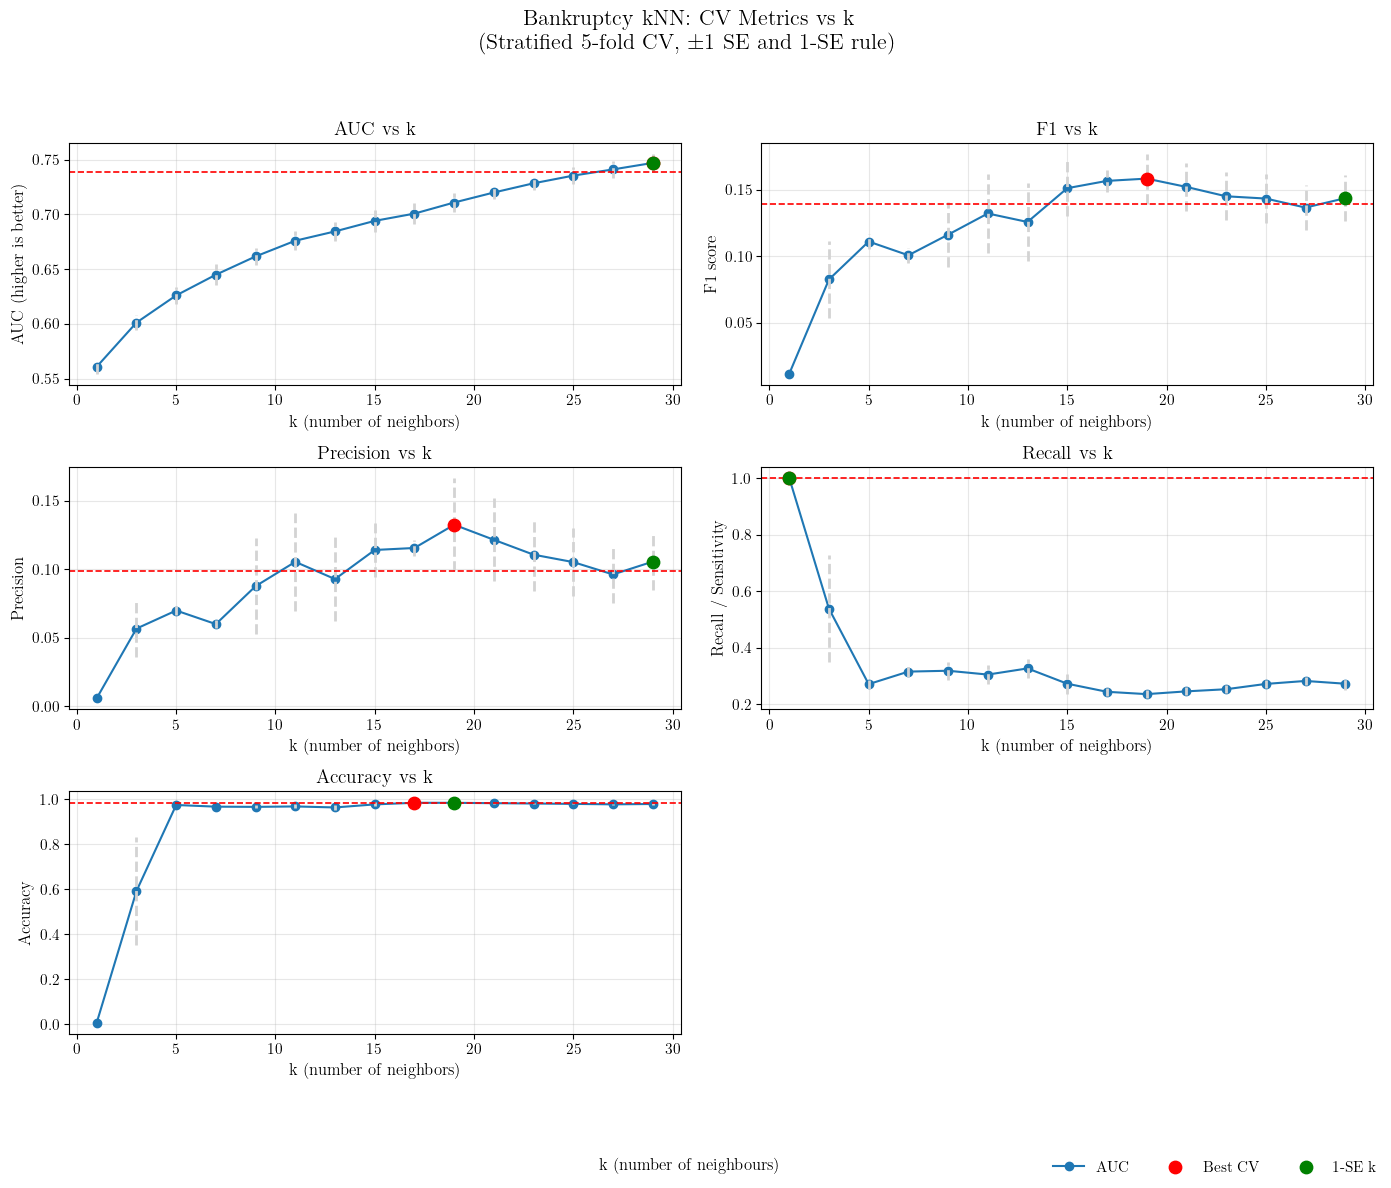

In [110]:
# ------------------------------------------------------------
# 5 subplots: AUC, F1, Precision, Recall, Accuracy, vs k
# with ±1 SE bars and 1-SE rule in each subplot
# ------------------------------------------------------------

metric_info = [
    ("AUC", "CV_AUC", "CV_SE_AUC", "AUC (higher is better)"),
    ("F1", "CV_F1", "CV_SE_F1", "F1 score"),
    ("Precision", "CV_Precision", "CV_SE_Precision", "Precision"),
    ("Recall", "CV_Recall", "CV_SE_Recall", "Recall / Sensitivity"),
    ("Accuracy", "CV_Acc", "CV_SE_Acc", "Accuracy"),
]

df = results_df.sort_values("k").copy()

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for ax, (name, mcol, secol, ylabel) in zip(axes, metric_info):

    # ----------------------------
    # best k
    # ----------------------------
    idx_best = df[mcol].idxmax()
    k_best   = int(df.loc[idx_best, "k"])
    m_best   = float(df.loc[idx_best, mcol])
    se_best  = float(df.loc[idx_best, secol])

    # 1-SE rule: accept metric >= best - SE(best)
    threshold = m_best - se_best
    candidates = df.loc[df[mcol].notna() & (df[mcol] >= threshold), "k"]
    k_1se = int(candidates.max()) if len(candidates) else k_best
    m_1se = float(df.loc[df["k"] == k_1se, mcol].iloc[0])

    # ----------------------------
    # plot main curve
    # ----------------------------
    ax.plot(df["k"], df[mcol], marker="o", label=name)

    # ±1 SE bars
    for _, row in df.iterrows():
        if np.isnan(row[mcol]) or np.isnan(row[secol]):
            continue
        ax.vlines(
            x=row["k"],
            ymin=row[mcol] - row[secol],
            ymax=row[mcol] + row[secol],
            colors="lightgray",
            linewidth=2,
            linestyles="dashed"
        )

    # best k and 1-SE k markers
    ax.scatter(k_best, m_best, color="red", s=80, zorder=5, label="Best CV")
    ax.scatter(k_1se, m_1se, color="green", s=80, zorder=5, label="1-SE k")

    # 1-SE threshold line
    ax.axhline(
        y=threshold,
        color="red",
        linestyle="--",
        linewidth=1.2
    )

    
    ax.set_xlabel("k (number of neighbors)")
    ax.tick_params(axis="x", which="both", labelbottom=True)
    ax.set_ylabel(ylabel)
    ax.set_title(f"{name} vs k")
    ax.grid(True, which="both", alpha=0.3)

# remove unused subplot in bottom-right
fig.delaxes(axes[-1])

# global labels
fig.supxlabel("k (number of neighbours)")
fig.suptitle(
    f"Bankruptcy kNN: CV Metrics vs k\n(Stratified {n_splits}-fold CV, ±1 SE and 1-SE rule)",
    fontsize=16
)

# legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right", ncol=3, frameon=False)

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()


# evaluate ratios using leave-one-out (LOO)

In [105]:
# fix k
idx_best = results_df["CV_F1"].idxmax()
# k_best = int(results_df.loc[idx_best, "k"])
k_best = 19


In [106]:
# create helper function to evaluate KNN metrics

def cv_knn_fixed_k(X, y, k, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    metrics = {"auc": [], "recall": [], "f1": []}

    for tr_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X[tr_idx], X[val_idx]
        y_tr, y_val = y[tr_idx], y[val_idx]

        scaler = StandardScaler()
        X_tr = scaler.fit_transform(X_tr)
        X_val = scaler.transform(X_val)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_tr, y_tr)

        pred = knn.predict(X_val)
        prob = knn.predict_proba(X_val)[:, 1]

        metrics["recall"].append(recall_score(y_val, pred, zero_division=0))
        metrics["f1"].append(f1_score(y_val, pred, zero_division=0))
        try:
            metrics["auc"].append(roc_auc_score(y_val, prob))
        except ValueError:
            metrics["auc"].append(np.nan)

    return {m: np.nanmean(v) for m, v in metrics.items()}


In [107]:
baseline_metrics = cv_knn_fixed_k(X, y, k=k_best)
baseline_metrics


{'auc': np.float64(0.7107905754110859),
 'recall': np.float64(0.02781954887218045),
 'f1': np.float64(0.05326991540386543)}

In [111]:
ablation = []

for feat in feature_cols:
    X_minus = X_df.drop(columns=[feat]).values
    metrics_minus = cv_knn_fixed_k(X_minus, y, k=k_best)

    ablation.append({
        "feature": feat,
        "Delta_AUC": baseline_metrics["auc"] - metrics_minus["auc"],
        "Delta_Recall": baseline_metrics["recall"] - metrics_minus["recall"],
        "Delta_F1": baseline_metrics["f1"] - metrics_minus["f1"],
    })

ablation_df = pd.DataFrame(ablation).sort_values("Delta_AUC", ascending=False)
ablation_df


,feature,Delta_AUC,Delta_Recall,Delta_F1
3,liabilities_to_assets,0.034801,0.021805,0.041390
6,debt_to_assets,0.022250,0.018045,0.034060
14,roa,0.014517,-0.003759,-0.006803
2,debt_to_equity,0.011686,-0.004511,-0.008212
8,earnings_per_share,0.010992,0.000752,0.001613
7,book_value_per_share,0.010829,-0.003759,-0.006742
11,retention_ratio,0.010486,-0.004511,-0.008149
9,dividend_payout_ratio,0.010448,-0.004511,-0.008149
4,interest_coverage,0.010361,-0.004511,-0.008087
13,net_profit_margin,0.010050,-0.004511,-0.008098
